<a href="https://colab.research.google.com/github/ijustwanttoputcodehere/Notatniki-Jupyter/blob/main/Knn_no_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AMaszynowe/Reuters_reduce_usa.csv')

In [ ]:
df = df.iloc[:,:-1]
df.fillna(0)

,labels,standard,oil,Co,and,BP,north,said,they,plan,to,form,a,ventur,manag,the,money,invest,activ,of,both,compani,Unnamed: 22,america,is,subsidiari,british,petroleum,lt,which,also,own,55,pct,interest,in,will,be,call,financi,...,satur,cdu,spd,coniston,rtz,pcw,walli,spencer,04/09/87,03/09/87,ttl,4/2/87,prev,Wk,Gr,Ay,cont,stcks,eddi,antar,campeau,conger,brooklyn,sinai,calmat,hodel,valeo,adb,eta,uccel,zimmerman,samjen,greenspan,syke,fild,datacard,decran,gerstner,phelan,dassler
0,usa,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,usa,0,0,1,3,0,0,2,0,0,0,0,1,0,1,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,usa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,canada,2,0,0,1,0,0,1,0,0,2,0,1,0,0,2,0,0,0,1,0,0,6,0,0,0,0,0,0,0,0,0,0,2,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,uk,0,0,0,0,0,0,0,1,0,3,0,3,0,0,0,0,0,0,1,0,0,6,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,japan,0,0,0,1,0,1,1,0,0,6,0,1,0,0,4,0,0,0,2,0,0,3,0,0,0,0,0,0,2,0,0,0,3,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3820,japan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3821,japan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3822,france,0,0,0,3,0,0,3,1,0,3,0,3,0,0,13,0,0,0,2,1,0,18,0,1,0,0,0,0,0,0,0,0,0,1,6,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.labels = pd.factorize(df.labels)[0]

X = df.iloc[:,1:].values
y = df['labels'].values

np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [ ]:
X #Wszystkie operacje wykonane z labelami :/

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5) #setting up the KNN model to use 5NN
knn.fit(X_train_scaled, y_train) #fitting the KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_preds = knn.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[131 147   0   1   1   0]
 [ 73 137   3   0   0   0]
 [ 56  95  61   4   4   0]
 [ 17  31   1   6   1   1]
 [ 37  44   1   1  27   0]
 [ 22  36   2   1   4  11]]


In [ ]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.39


In [ ]:
from sklearn.metrics import plot_confusion_matrix

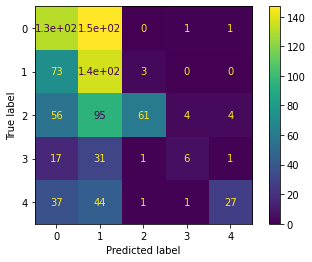

In [ ]:
plot_confusion_matrix(knn, X_test_scaled, y_test,labels = [0,1,2,3,4])  # doctest: +SKIP
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
precision_score(y_test, y_preds,average='weighted')


0.5672775086948287

In [ ]:
accuracy_score(y_test, y_preds)

0.3901673640167364

In [ ]:
recall_score(y_test, y_preds, average='weighted')

0.3901673640167364